In [1]:
from os import walk
import numpy as np
from matplotlib.colors import LogNorm
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)
plt.rcParams.update({'font.size': 7})

In [2]:
f_name = "/coefficient.dat"
fo_name = "./oscillatory_bounday_condition/lhs_data/" 
(_,cases,_)=next(walk(fo_name))

In [3]:
#os.sysytem(pyhton3 temp.py)
import pickle

with open('config.dictionary', 'rb') as config_dictionary_file:
 
    data = pickle.load(config_dictionary_file)
 
    #print(config_dictionary)

In [4]:
tml  = (np.abs(list(data.values())[0][0] - 4.0)).argmin()
print(tml)

4000


In [5]:
n = 500

In [6]:
#fig, (ax) = plt.subplots(1, 1, figsize=(7, 4))
for i, case in enumerate(cases):
    a = data[case][0][tml:]
    b = data[case][1][tml:]
    #ax.plot(a, b, linewidth=2)


In [7]:

mesh_size = np.arange(1, (n) + 1, 1)

mean_cd = np.zeros(len(cases))
max_cd = np.zeros(len(cases))
min_cd = np.zeros(len(cases))

for i, case in enumerate(cases):
    mean_cd[i] = data[case][1][tml:].mean()
    max_cd[i] = data[case][1][tml:].max()
    min_cd[i] = data[case][1][tml:].min()
plt.plot(mesh_size, mean_cd, '--o', markersize=10, color='Purple')
plt.plot(mesh_size, max_cd, '-s', markersize=10, color='r')
plt.plot(mesh_size, min_cd, '-D', markersize=10, color='b')
plt.close()

In [8]:
print('maximum of max value is at',cases[max_cd.argmax()], ' :', max_cd.max())
print('minimum of max value is at',cases[max_cd.argmin()], ' :', max_cd.min())
print('\n')
print('maximum of min value is at',cases[min_cd.argmax()], ' :', min_cd.max())
print('minimum of min value is at',cases[min_cd.argmin()], ' :', min_cd.min())
print('\n')
print('maximum of mean value is at',cases[mean_cd.argmax()], ' :', mean_cd.max())
print('minimum of mean value is at',cases[mean_cd.argmin()], ' :', mean_cd.min())

dif = max_cd - min_cd
print('\n')
print('maximum of dif value is at',cases[dif.argmax()], ' :', dif.max())
print('minimum of dif value is at',cases[dif.argmin()], ' :', dif.min(), ', (', max_cd[dif.argmin()],'-',min_cd[dif.argmin()],')')


maximum of max value is at A3.01068-f3.0121  : 10.8880428
minimum of max value is at A3.09952-f10.1291  : 2.94342326


maximum of min value is at A3.01068-f3.0121  : 6.52772132
minimum of min value is at A3.09952-f10.1291  : 2.80689468


maximum of mean value is at A3.01068-f3.0121  : 8.455178171032241
minimum of mean value is at A3.09952-f10.1291  : 2.872019565183704


maximum of dif value is at A3.06176-f3.16594  : 4.699564560000001
minimum of dif value is at A0.101694-f11.2224  : 0.048989810000000134 , ( 3.18463589 - 3.13564608 )


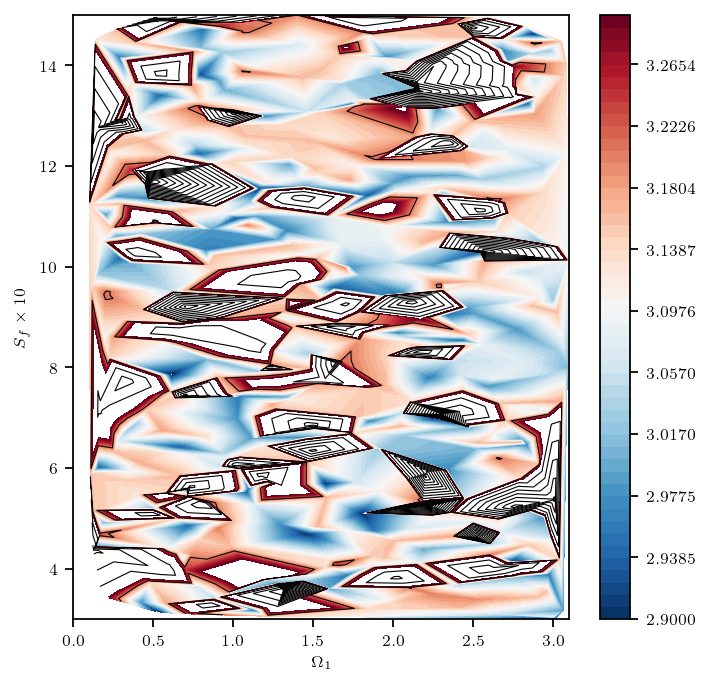

<Figure size 960x640 with 0 Axes>

In [30]:
csv = np.genfromtxt('data_LHS.csv', delimiter=",")
amp = csv[:,0]
fq = csv[:,1]

fig, (ax2) = plt.subplots(1, 1, figsize=(5, 5))
lvls_2 = np.logspace(np.log10(2.9), np.log10(3.3), 50)
ax2.tricontour(amp, fq, mean_cd, levels=14, linewidths=0.5, colors='k')
cntr2 = ax2.tricontourf(amp, fq, mean_cd, levels=lvls_2, cmap="RdBu_r")

fig.colorbar(cntr2, ax=ax2)
ax2.set(xlim=(0, 3.1), ylim=(3, 15))
ax2.set_ylabel(r'$S_f \times 10$')
ax2.set_xlabel('$\Omega_1$')

plt.subplots_adjust(hspace=0.5)
plt.show()
plt.savefig('img1.png')



In [ ]:
fig, (ax) = plt.subplots(1, 1, figsize=(10, 7))

a1 = np.resize((max_cd - min_cd), (len(fq), len(amp)))
lvls_2 = np.logspace(np.log10(a1.min()), np.log10(0.3), 50)

cont = ax.contourf(X, Y, a1, levels=lvls_2, cmap=mpl.cm.coolwarm)
ax.set_title('oscillatory parameter study')
ax.set_ylabel(r'$S_f \times 10$')
ax.set_xlabel('$\Omega_1$')
ax.set_xticks(np.arange(amp.min(), amp.max(), 0.1))
fig.colorbar(cont,format='%.4f')